In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score,confusion_matrix,classification_report, roc_curve, roc_auc_score,auc

In [2]:
dataset= pd.read_csv('creditcard.csv')

In [3]:
dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
dataset['Amount_Stand'] = scaler.fit_transform(dataset['Amount'].values.reshape(-1, 1))
dataset['Time_Stand'] = scaler.fit_transform(dataset['Time'].values.reshape(-1, 1))
dataset = dataset.drop(['Time', 'Amount'], axis=1)

In [5]:
dataset.shape

(284807, 31)

In [43]:
dataset.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Amount_Stand,Time_Stand
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


In [44]:
dataset.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class',
       'Amount_Stand', 'Time_Stand'],
      dtype='object')

In [45]:
dataset.index

RangeIndex(start=0, stop=284807, step=1)

In [46]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
V1              284807 non-null float64
V2              284807 non-null float64
V3              284807 non-null float64
V4              284807 non-null float64
V5              284807 non-null float64
V6              284807 non-null float64
V7              284807 non-null float64
V8              284807 non-null float64
V9              284807 non-null float64
V10             284807 non-null float64
V11             284807 non-null float64
V12             284807 non-null float64
V13             284807 non-null float64
V14             284807 non-null float64
V15             284807 non-null float64
V16             284807 non-null float64
V17             284807 non-null float64
V18             284807 non-null float64
V19             284807 non-null float64
V20             284807 non-null float64
V21             284807 non-null float64
V22             284807 non-null float64
V23      

In [47]:
dataset.isnull().sum()

V1              0
V2              0
V3              0
V4              0
V5              0
V6              0
V7              0
V8              0
V9              0
V10             0
V11             0
V12             0
V13             0
V14             0
V15             0
V16             0
V17             0
V18             0
V19             0
V20             0
V21             0
V22             0
V23             0
V24             0
V25             0
V26             0
V27             0
V28             0
Class           0
Amount_Stand    0
Time_Stand      0
dtype: int64

In [6]:
dataset.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Amount_Stand,Time_Stand
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,2.848070e+05,2.848070e+05
mean,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,...,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,0.001727,3.202236e-16,-1.050379e-14
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,0.041527,1.000002e+00,1.000002e+00
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,-3.532294e-01,-1.996583e+00
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,0.000000,-3.308401e-01,-8.552120e-01
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,0.000000,-2.652715e-01,-2.131453e-01
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,0.000000,-4.471707e-02,9.372174e-01
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.000000,1.023622e+02,1.642058e+00


In [7]:
print("Number of normal transactions:",dataset['Class'].value_counts().values[0])
print("Number of fraudulent transactions:",dataset['Class'].value_counts().values[1])

Number of normal transactions: 284315
Number of fraudulent transactions: 492


In [8]:
X=dataset.drop(['Class'],axis=1)
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount_Stand,Time_Stand
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,-1.996541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151,1.641931
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117,1.641952
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839,1.641974
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249,1.641974


In [9]:
y=dataset['Class']
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

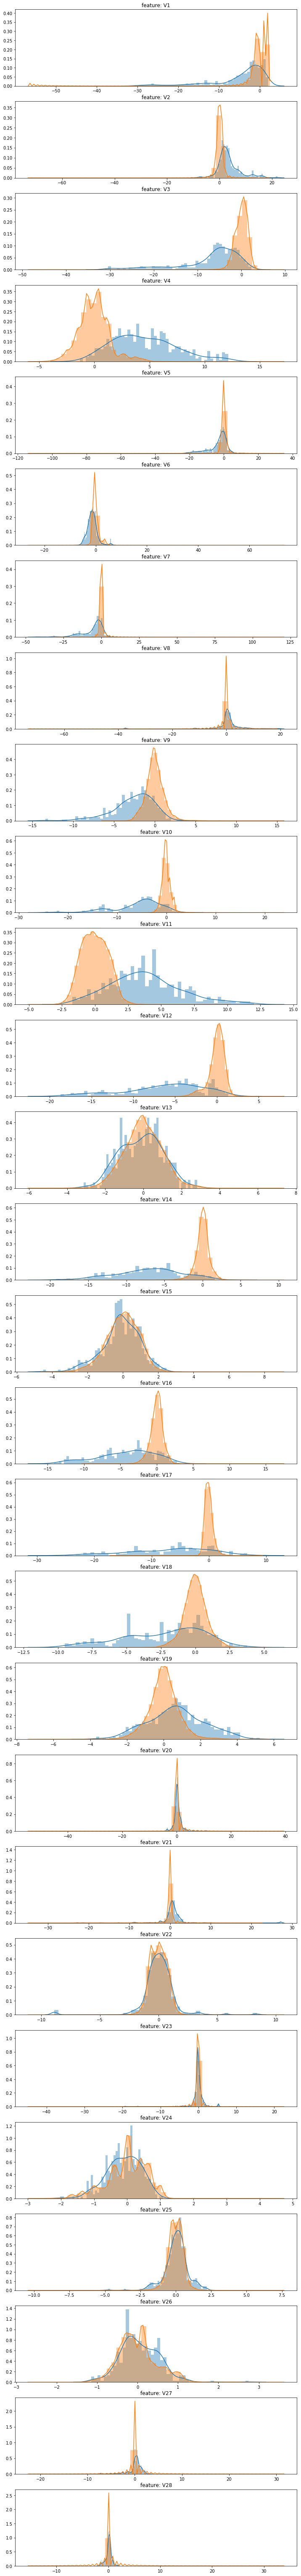

In [10]:
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(dataset[dataset.iloc[:, 0:28].columns]):
   ax = plt.subplot(gs[i])
   sns.distplot(dataset[cn][dataset.Class == 1], bins=50)
   sns.distplot(dataset[cn][dataset.Class == 0], bins=50)
   ax.set_xlabel('')
   ax.set_title('feature: ' + str(cn))
plt.show()

In [11]:
X_scaled=scaler.fit_transform(X)
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
X_train,X_test,y_train,y_test= train_test_split(X_scaled ,y,test_size=0.3,random_state=45)

In [54]:
X_train.shape

(199364, 30)

In [19]:
y_train.shape

(199364,)

In [20]:
X_test.shape

(85443, 30)

In [21]:
y_test.shape

(85443,)

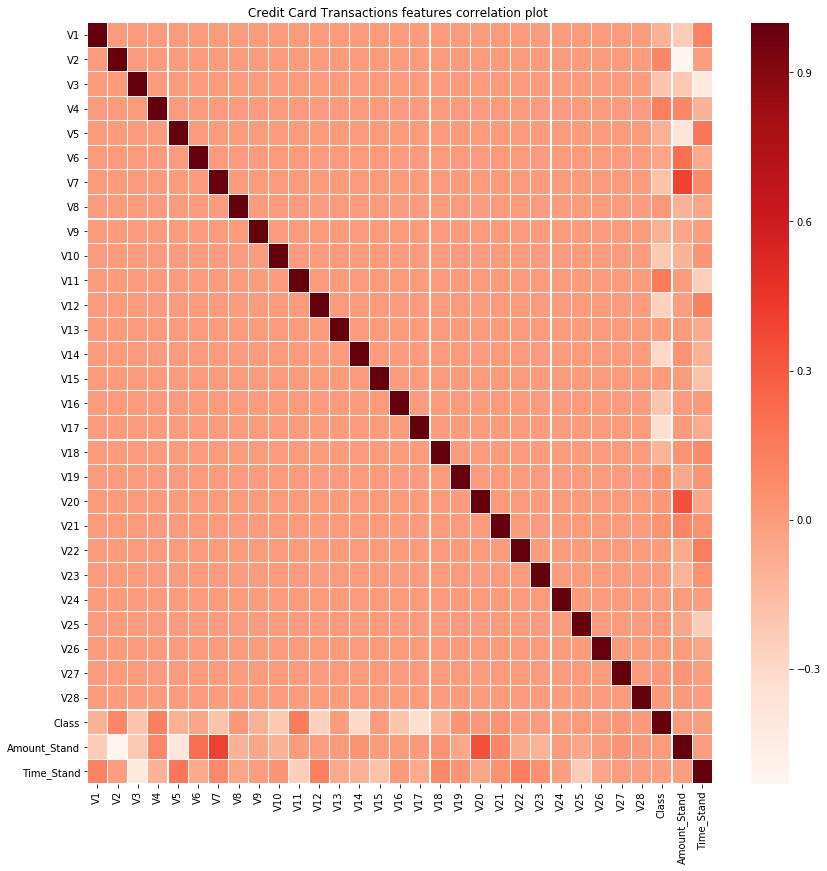

In [12]:
plt.figure(figsize = (14,14))
plt.title('Credit Card Transactions features correlation plot ')
corr = dataset.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

In [13]:
from imblearn.over_sampling import ADASYN 
ada = ADASYN(random_state=42)
print('Original dataset shape',y_train)
X_res, y_res = ada.fit_sample(X_train, y_train)
print('Resampled dataset shape', y_res)

Using TensorFlow backend.


Original dataset shape 158708    0
188612    0
191155    0
203206    0
10913     0
         ..
258063    0
167544    0
127353    0
49315     0
81853     0
Name: Class, Length: 199364, dtype: int64
Resampled dataset shape 0         0
1         0
2         0
3         0
4         0
         ..
398067    1
398068    1
398069    1
398070    1
398071    1
Name: Class, Length: 398072, dtype: int64


In [14]:
X_train, y_train = X_res, y_res 

In [15]:
def display_scores(scores):
    print("Scores",scores)
    print("Scores Mean",scores.mean())
    print("Scores Deviation",scores.std())

In [16]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(random_state=45)
sgd.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=45, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [17]:

sgd_cv_scores = cross_val_score(sgd, X_train, y_train, cv=10, scoring= "accuracy") 
display_scores(sgd_cv_scores)
sgd_cv_accuracy = sgd_cv_scores.mean()
y_pred = cross_val_predict(sgd, X_train, y_train, cv=10)
confusion_matrix(y_train, y_pred )
sgd_cv_classification = classification_report(y_train, y_pred )
sgd_cv_precision = precision_score(y_train,y_pred )
sgd_cv_recall = recall_score(y_train, y_pred)
sgd_cv_f1_score = f1_score(y_train, y_pred)
print(sgd_cv_precision)
print(sgd_cv_recall)
print(sgd_cv_f1_score)
print(sgd_cv_classification)

Scores [0.86741359 0.88680667 0.89994222 0.95252091 0.83696335 0.87607707
 0.87429347 0.87680559 0.84949883 0.89072274]
Scores Mean 0.8811044433887074
Scores Deviation 0.029673448840971756
0.9147012191788311
0.8405958750973447
0.8760842529683592
              precision    recall  f1-score   support

           0       0.85      0.92      0.89    199037
           1       0.91      0.84      0.88    199035

    accuracy                           0.88    398072
   macro avg       0.88      0.88      0.88    398072
weighted avg       0.88      0.88      0.88    398072



In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
lg= LogisticRegression(random_state=45)
lg = lg.fit(X_train,y_train)


In [19]:
lg_cv_scores = cross_val_score(lg, X_train, y_train, cv=10, scoring= "accuracy") 
display_scores(lg_cv_scores)
lg_cv_accuracy = lg_cv_scores.mean()
y_pred = cross_val_predict(lg, X_train, y_train, cv=10)
confusion_matrix(y_train, y_pred )
lg_cv_classification = classification_report(y_train, y_pred )
lg_cv_precision = precision_score(y_train,y_pred )
lg_cv_recall = recall_score(y_train, y_pred)
lg_cv_f1_score = f1_score(y_train, y_pred)
print(lg_cv_precision)
print(lg_cv_recall)
print(lg_cv_f1_score)
print(lg_cv_classification)

Scores [0.86736334 0.8853748  0.88828598 0.95008416 0.84429874 0.89690255
 0.88057377 0.86916874 0.84995101 0.89042128]
Scores Mean 0.8822424379175947
Scores Deviation 0.027943158394804962
0.9148576507604138
0.842932147612229
0.877423369994404
              precision    recall  f1-score   support

           0       0.85      0.92      0.89    199037
           1       0.91      0.84      0.88    199035

    accuracy                           0.88    398072
   macro avg       0.88      0.88      0.88    398072
weighted avg       0.88      0.88      0.88    398072



In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
rf= RandomForestClassifier(random_state=45)
rf = rf.fit(X_train,y_train)

In [17]:
rf_cv_scores = cross_val_score(rf, X_train, y_train, cv=10, scoring= "accuracy") 
display_scores(rf_cv_scores)
rf_cv_accuracy = rf_cv_scores.mean()
y_pred = cross_val_predict(rf, X_train, y_train, cv=10)
confusion_matrix(y_train, y_pred )
rf_cv_classification = classification_report(y_train, y_pred )
rf_cv_precision = precision_score(y_train,y_pred )
rf_cv_recall = recall_score(y_train, y_pred)
rf_cv_f1_score = f1_score(y_train, y_pred)
print(rf_cv_precision)
print(rf_cv_recall)
print(rf_cv_f1_score)
print(rf_cv_classification)

Scores [0.91614751 0.91607215 0.9019268  0.92983646 0.90355968 0.87964428
 0.87469541 0.88537192 0.95932876 0.94347728]
Scores Mean 0.9110060235143207
Scores Deviation 0.026254833163660556
0.9997617403947778
0.8222071494963198
0.9023329161175777
              precision    recall  f1-score   support

           0       0.85      1.00      0.92    199037
           1       1.00      0.82      0.90    199035

    accuracy                           0.91    398072
   macro avg       0.92      0.91      0.91    398072
weighted avg       0.92      0.91      0.91    398072



In [20]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(max_depth=50,random_state=45)
dec_tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=50, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=45, splitter='best')

In [21]:
dec_tree_cv_scores = cross_val_score(dec_tree, X_train, y_train, cv=10, scoring= "accuracy") 
display_scores(dec_tree_cv_scores)
dec_tree_cv_accuracy = dec_tree_cv_scores.mean()
y_pred = cross_val_predict(dec_tree, X_train, y_train, cv=10)
confusion_matrix(y_train, y_pred )
dec_tree_cv_classification = classification_report(y_train, y_pred )
dec_tree_cv_precision = precision_score(y_train,y_pred )
dec_tree_cv_recall = recall_score(y_train, y_pred)
dec_tree_cv_f1_score = f1_score(y_train, y_pred)
print(dec_tree_cv_precision)
print(dec_tree_cv_recall)
print(dec_tree_cv_f1_score)
print(dec_tree_cv_classification)

Scores [0.91692625 0.91396202 0.946115   0.93699601 0.92702289 0.8907981
 0.91642173 0.91390961 0.96329791 0.90052001]
Scores Mean 0.922596953077942
Scores Deviation 0.02038496779455575
0.9976746800466247
0.8471675835908258
0.9162817489213246
              precision    recall  f1-score   support

           0       0.87      1.00      0.93    199037
           1       1.00      0.85      0.92    199035

    accuracy                           0.92    398072
   macro avg       0.93      0.92      0.92    398072
weighted avg       0.93      0.92      0.92    398072



In [22]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier(n_estimators=20, max_depth=10, random_state=42)
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=10, min_child_weight=1, missing=None, n_estimators=20,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1)

In [23]:
xgb_clf_cv_scores = cross_val_score(xgb_clf, X_train, y_train, cv=10, scoring= "accuracy") 
display_scores(xgb_clf_cv_scores)
xgb_clf_cv_accuracy = xgb_clf_cv_scores.mean()
y_pred = cross_val_predict(xgb_clf, X_train, y_train, cv=10)
confusion_matrix(y_train, y_pred )
xgb_clf_classification = classification_report(y_train, y_pred )
xgb_clf_cv_precision = precision_score(y_train,y_pred )
xgb_clf_cv_recall = recall_score(y_train, y_pred)
xgb_clf_cv_f1_score = f1_score(y_train, y_pred)
print(xgb_clf_cv_precision)
print(xgb_clf_cv_recall)
print(xgb_clf_cv_f1_score)
print(xgb_clf_classification)

Scores [0.93865555 0.9315213  0.96312206 0.95322431 0.92275228 0.91039264
 0.96480519 0.91812998 0.98733891 0.96606125]
Scores Mean 0.94560034622843
Scores Deviation 0.023785299311680465
0.9904335324043353
0.8998919787976989
0.9429944060546231
              precision    recall  f1-score   support

           0       0.91      0.99      0.95    199037
           1       0.99      0.90      0.94    199035

    accuracy                           0.95    398072
   macro avg       0.95      0.95      0.95    398072
weighted avg       0.95      0.95      0.95    398072



In [24]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred=lr.predict(X_test)

In [25]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared error",mse)
r_squared = r2_score(y_test, y_pred)
print("R2 score",r_squared)

Mean Squared error 0.10481734459767646
R2 score -53.383252722747315


In [31]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(random_state=45)
sgd.fit(X_train, y_train)
y_pred=sgd.predict(X_test)

 The accuracy for SGD Classifier is: 0.9109347752302704
 The precision for SGD Classifier is: 0.019987105093488073
 The recall for SGD Classifier is: 0.9393939393939394
 The f1 score for SGD Classifier is: 0.039141414141414144
The n_errors are 7610
              precision    recall  f1-score   support

           0       1.00      0.91      0.95     85278
           1       0.02      0.94      0.04       165

    accuracy                           0.91     85443
   macro avg       0.51      0.93      0.50     85443
weighted avg       1.00      0.91      0.95     85443

The confusion matrix for SGD Classifier is [[77678  7600]
 [   10   155]]


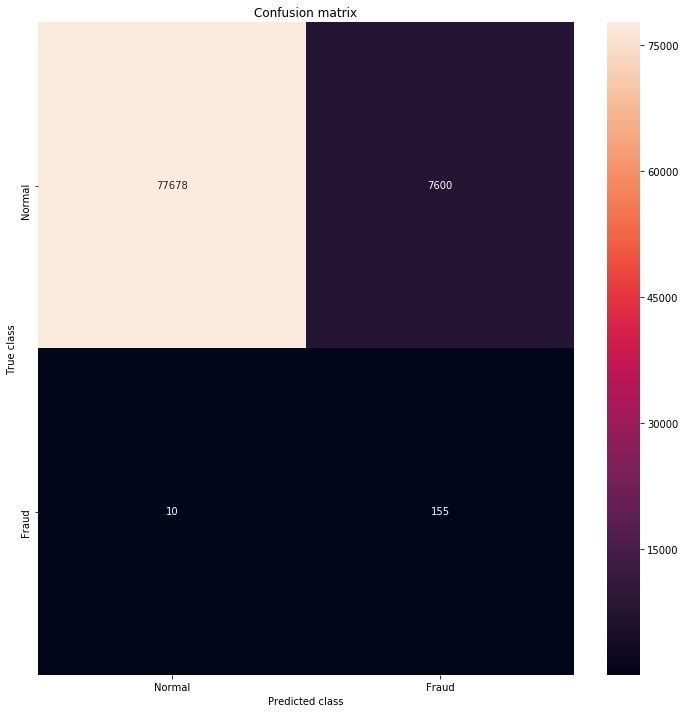

0.9251368252282909


Text(0.5, 0, 'False Positive Rate')

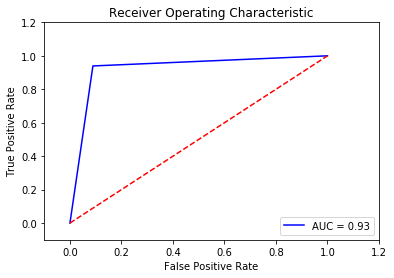

In [32]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score,confusion_matrix 
sgd_accuracy= accuracy_score(y_test, y_pred)
print(" The accuracy for SGD Classifier is:",sgd_accuracy)
sgd_precision = precision_score(y_test, y_pred)
print(" The precision for SGD Classifier is:",sgd_precision)
sgd_recall = recall_score(y_test, y_pred)
print(" The recall for SGD Classifier is:",sgd_recall)
sgd_f1_score = f1_score(y_test, y_pred)
print(" The f1 score for SGD Classifier is:",sgd_f1_score)
n_errors = (y_pred != y_test).sum()
print("The n_errors are",n_errors)
sgd_classification = classification_report(y_test, y_pred )
print(sgd_classification)
sgd_confusion_matrix = confusion_matrix(y_test, y_pred)
print("The confusion matrix for SGD Classifier is",sgd_confusion_matrix)
LABELS = ['Normal', 'Fraud']
plt.figure(figsize=(12, 12))
sns.heatmap(sgd_confusion_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt='d');
plt.title('Confusion matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print (roc_auc)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
lg= LogisticRegression(random_state=45)
lg = lg.fit(X_train,y_train)
y_pred=lg.predict(X_test)

 The accuracy for logistic regression is: 0.9202392238100254
 The precision for logistic regression is: 0.022132796780684104
 The recall for logistic regression is: 0.9333333333333333
 The f1 score for logistic regression is: 0.04324020777762178
The n_errors are 6815
              precision    recall  f1-score   support

           0       1.00      0.92      0.96     85278
           1       0.02      0.93      0.04       165

    accuracy                           0.92     85443
   macro avg       0.51      0.93      0.50     85443
weighted avg       1.00      0.92      0.96     85443

The confusion matrix for Lgistic Regression is [[78474  6804]
 [   11   154]]


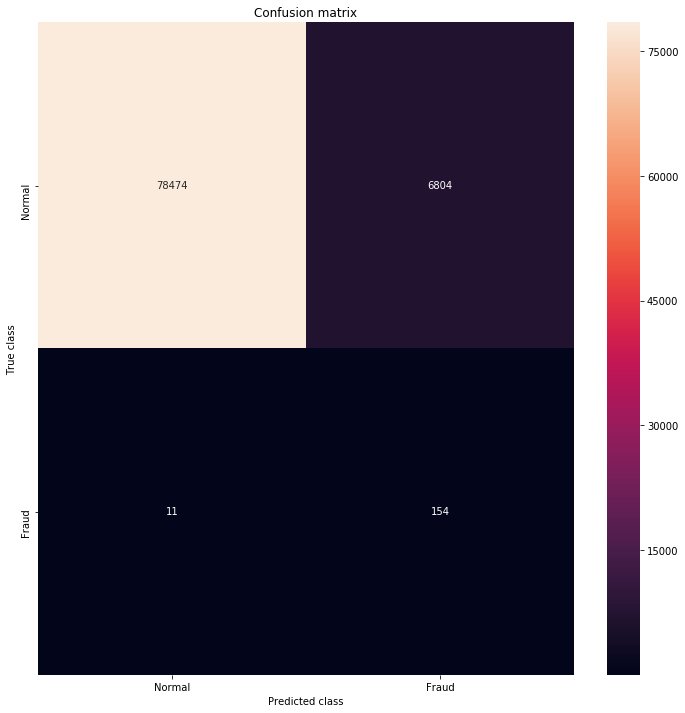

0.9267736110133915


Text(0.5, 0, 'False Positive Rate')

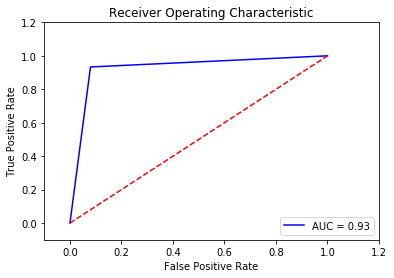

In [30]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
lg_accuracy= accuracy_score(y_test, y_pred)
print(" The accuracy for logistic regression is:",lg_accuracy)
lg_precision = precision_score(y_test, y_pred)
print(" The precision for logistic regression is:",lg_precision)
lg_recall = recall_score(y_test, y_pred)
print(" The recall for logistic regression is:",lg_recall)
lg_f1_score = f1_score(y_test, y_pred)
print(" The f1 score for logistic regression is:",lg_f1_score)
n_errors = (y_pred != y_test).sum()
print("The n_errors are",n_errors)
lg_classification = classification_report(y_test, y_pred )
print(lg_classification)
lg_confusion_matrix = confusion_matrix(y_test, y_pred)
print("The confusion matrix for Lgistic Regression is",lg_confusion_matrix)
LABELS = ['Normal', 'Fraud']
plt.figure(figsize=(12, 12))
sns.heatmap(lg_confusion_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt='d');
plt.title('Confusion matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print (roc_auc)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
rf= RandomForestClassifier(random_state=45)
rf = rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

 The accuracy for random forest is: 0.9202392238100254
 The precision for random forest is: 0.9013157894736842
 The recall for random forest is: 0.8303030303030303
 The f1 score for random forest is: 0.8643533123028391
The n_errors are 43
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85278
           1       0.90      0.83      0.86       165

    accuracy                           1.00     85443
   macro avg       0.95      0.92      0.93     85443
weighted avg       1.00      1.00      1.00     85443

The confusion matrix for random forest is [[85263    15]
 [   28   137]]


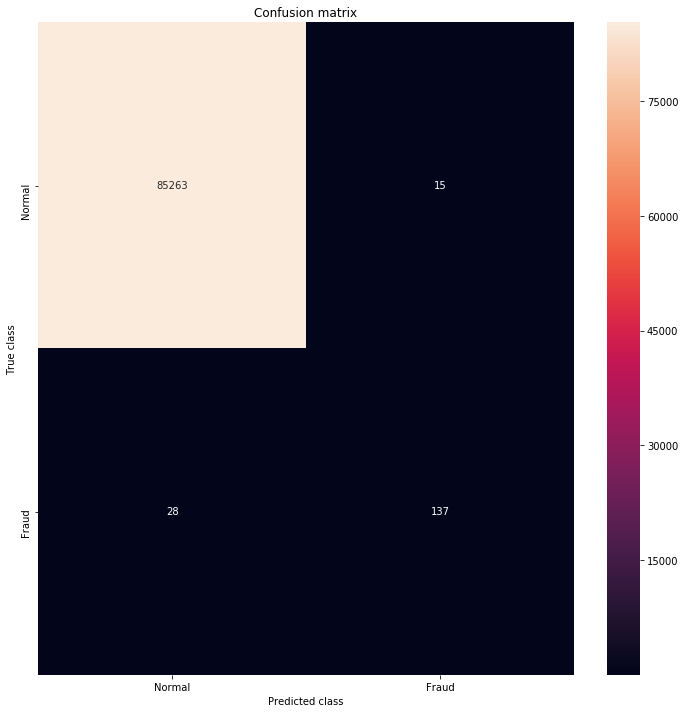

0.9150635674979585


Text(0.5, 0, 'False Positive Rate')

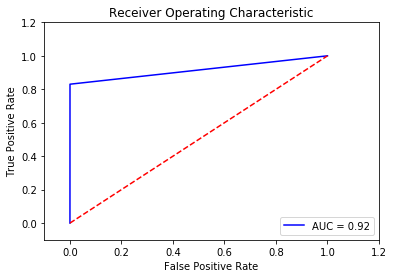

In [39]:
rf_accuracy= accuracy_score(y_test, y_pred)
print(" The accuracy for random forest is:",lg_accuracy)
rf_precision = precision_score(y_test, y_pred)
print(" The precision for random forest is:",rf_precision)
rf_recall = recall_score(y_test, y_pred)
print(" The recall for random forest is:",rf_recall)
rf_f1_score = f1_score(y_test, y_pred)
print(" The f1 score for random forest is:",rf_f1_score)
n_errors = (y_pred != y_test).sum()
print("The n_errors are",n_errors)
rf_confusion_matrix = confusion_matrix(y_test, y_pred)
rf_classification = classification_report(y_test, y_pred )
print(rf_classification)
print("The confusion matrix for random forest is",rf_confusion_matrix)
LABELS = ['Normal', 'Fraud']
plt.figure(figsize=(12, 12))
sns.heatmap(rf_confusion_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt='d')
plt.title('Confusion matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print (roc_auc)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [33]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(max_depth=50,random_state=45)
dec_tree.fit(X_train,y_train)
y_pred=dec_tree.predict(X_test)

 The accuracy for decision tree is: 0.9973432580784851
 The precision for decision tree is: 0.4025157232704403
 The recall for decision tree is: 0.7757575757575758
 The f1 score for decision tree is: 0.5300207039337475
The n_errors are 227
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85278
           1       0.40      0.78      0.53       165

    accuracy                           1.00     85443
   macro avg       0.70      0.89      0.76     85443
weighted avg       1.00      1.00      1.00     85443

The confusion matrix for decision tree is [[85088   190]
 [   37   128]]


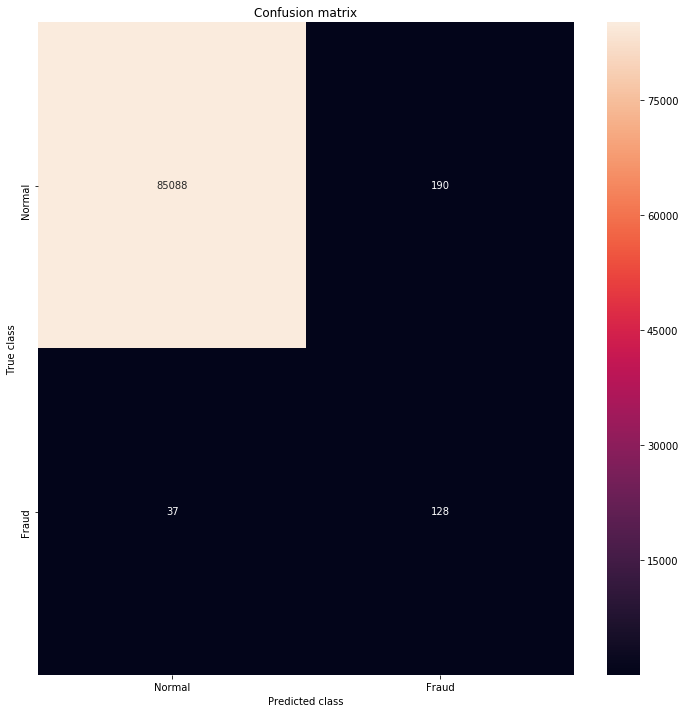

0.886764784267071


Text(0.5, 0, 'False Positive Rate')

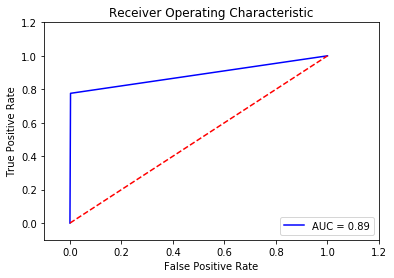

In [34]:
dec_accuracy= accuracy_score(y_test, y_pred)
print(" The accuracy for decision tree is:",dec_accuracy)
dec_precision = precision_score(y_test, y_pred)
print(" The precision for decision tree is:",dec_precision)
dec_recall = recall_score(y_test, y_pred)
print(" The recall for decision tree is:",dec_recall)
dec_f1_score = f1_score(y_test, y_pred)
print(" The f1 score for decision tree is:",dec_f1_score)
n_errors = (y_pred != y_test).sum()
print("The n_errors are",n_errors)
dec_confusion_matrix = confusion_matrix(y_test, y_pred)
dec_classification = classification_report(y_test, y_pred )
print(dec_classification)
print("The confusion matrix for decision tree is",dec_confusion_matrix)
LABELS = ['Normal', 'Fraud']
plt.figure(figsize=(12, 12))
sns.heatmap(dec_confusion_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt='d');
plt.title('Confusion matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print (roc_auc)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [36]:
import xgboost as xgb
clf = xgb.XGBClassifier(n_estimators=500, objective='binary:logistic', eval_metric='auc', eta=0.1, max_depth=6, subsample=1, colsample_bytree=0.3, silent=1)
clf.fit(X_train, y_train, early_stopping_rounds=20, eval_metric="auc", eval_set=[(X_test, y_test)])

[0]	validation_0-auc:0.959278
Will train until validation_0-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.976994
[2]	validation_0-auc:0.975649
[3]	validation_0-auc:0.976616
[4]	validation_0-auc:0.977623
[5]	validation_0-auc:0.977226
[6]	validation_0-auc:0.976214
[7]	validation_0-auc:0.978133
[8]	validation_0-auc:0.977082
[9]	validation_0-auc:0.9777
[10]	validation_0-auc:0.976838
[11]	validation_0-auc:0.976779
[12]	validation_0-auc:0.978867
[13]	validation_0-auc:0.978852
[14]	validation_0-auc:0.979359
[15]	validation_0-auc:0.979735
[16]	validation_0-auc:0.981158
[17]	validation_0-auc:0.981691
[18]	validation_0-auc:0.981406
[19]	validation_0-auc:0.981133
[20]	validation_0-auc:0.981778
[21]	validation_0-auc:0.98281
[22]	validation_0-auc:0.982692
[23]	validation_0-auc:0.981664
[24]	validation_0-auc:0.982354
[25]	validation_0-auc:0.982392
[26]	validation_0-auc:0.982903
[27]	validation_0-auc:0.982419
[28]	validation_0-auc:0.982135
[29]	validation_0-auc:0.982078
[30]	validation_0-a

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=0.3, eta=0.1, eval_metric='auc', gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=1, subsample=1)

 The accuracy for XGB Classifier is: 0.9845511042449352
 The precision for XGB Classifier is: 0.10472279260780287
 The recall for XGB Classifier is: 0.9272727272727272
 The f1 score for XGB Classifier is: 0.18819188191881916
The n_errors are 1320
 The classification for XGB Classifier is:               precision    recall  f1-score   support

           0       1.00      0.98      0.99     85278
           1       0.10      0.93      0.19       165

    accuracy                           0.98     85443
   macro avg       0.55      0.96      0.59     85443
weighted avg       1.00      0.98      0.99     85443

The confusion matrix for XGB Classifier is [[83970  1308]
 [   12   153]]


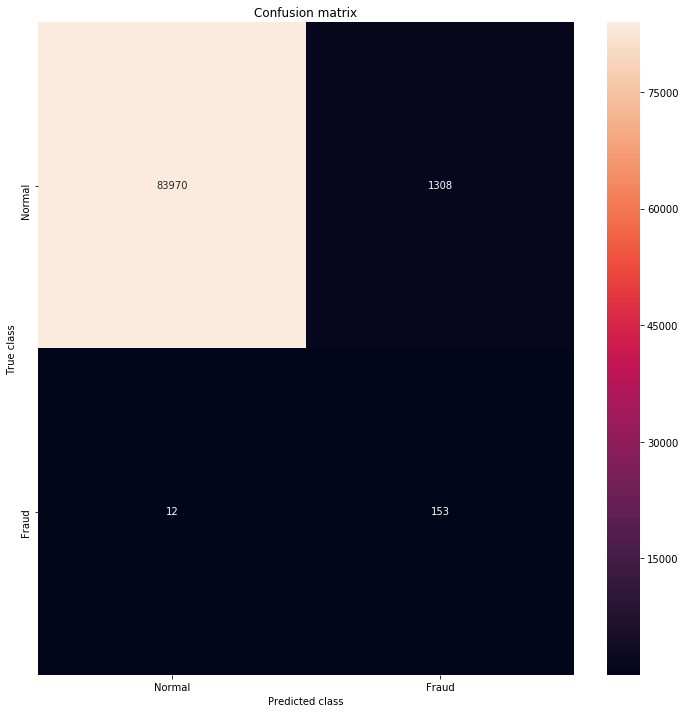

0.9559673282462278


Text(0.5, 0, 'False Positive Rate')

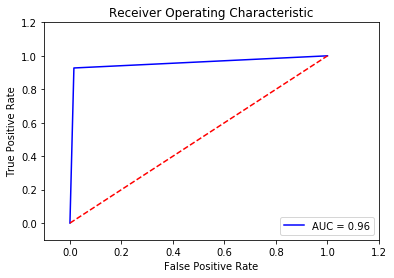

In [37]:
y_pred=clf.predict(X_test)
clf_accuracy= accuracy_score(y_test, y_pred)
print(" The accuracy for XGB Classifier is:",clf_accuracy)
clf_precision = precision_score(y_test, y_pred)
print(" The precision for XGB Classifier is:",clf_precision)
clf_recall = recall_score(y_test, y_pred)
print(" The recall for XGB Classifier is:",clf_recall)
clf_f1_score = f1_score(y_test, y_pred)
print(" The f1 score for XGB Classifier is:",clf_f1_score)
n_errors = (y_pred != y_test).sum()
print("The n_errors are",n_errors)
clf_classification = classification_report(y_test, y_pred )
print(" The classification for XGB Classifier is:",clf_classification)
clf_confusion_matrix = confusion_matrix(y_test, y_pred)
print("The confusion matrix for XGB Classifier is",clf_confusion_matrix)
LABELS = ['Normal', 'Fraud']
plt.figure(figsize=(12, 12))
sns.heatmap(clf_confusion_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt='d');
plt.title('Confusion matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print (roc_auc)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')